[Newton-Cotes vs. Gauss Quadrature] 

In [1]:
from sympy import *

In [2]:
t = Symbol("t")

In [ ]:
# {1, x − 1/2, x2 − x + 1/6}

In [24]:
onb = [1,t-1/2,t**2 - t + 1/6]

In [25]:
integrate(t**3 * onb [1],(t,0,1)).nsimplify()

3/40

In [26]:
def phi(k):
    return integrate(t**3 * onb [k],(t,0,1)).nsimplify() / integrate(onb [k] * onb [k],(t,0,1)).nsimplify()

In [27]:
p_n = t**3 - phi(0)* onb[0] - phi(1)* onb[1] - phi(2)* onb[2]

In [46]:
zeros = [1/2,1/2 - sqrt(3/20).nsimplify(),1/2 + sqrt(3/20).nsimplify()]
zeros

[0.5, 0.5 - sqrt(15)/10, sqrt(15)/10 + 0.5]

In [47]:
def Lagrange(arr,k):
    x_i = arr[k]
    def lk(x):
        L = 1
        for xk in arr:
            if xk == x_i:
                0
            else:
            
                L *= (x - xk)/(x_i - xk)
        return L
    return lk

Lagrange(zeros,1)(t)


10*(t - 0.5)*(t - 0.5 - sqrt(15)/10)/3

In [49]:
L_1 = Lagrange(zeros,1)(t)
L_1.simplify()

-(t - 0.5)*(-10*t + sqrt(15) + 5.0)/3

In [55]:
#calculate w1

In [56]:
W_1 = integrate((L_1**2).nsimplify(),(t,0,1))

In [57]:
W_1 # W_0 W_2 ähnlichsimilar

5/18

In [60]:
W = []
for k in range(0,3):
    L = Lagrange(zeros,k)(t)
    W.append ( integrate((L**2).nsimplify(),(t,0,1)) )

In [61]:
W

[4/9, 5/18, 5/18]

calculate simpson and gauss quadratur x**k

In [83]:
error1 = []
error2 = []
for i in range(8):
    sol = 1/(i + 1)
    i = 1
    def f(x):
        return x**i
    sum_1 = 0
    for k in range(3):
        sum_1 += f(zeros[k]) * W[k]
    error1.append(abs(sum_1 - sol))
    b = 1
    a = 0
    simpson = (b - a )/6 * ( f(a) + 4*f((a+b)/2) + f(b))
    error2.append(abs(simpson - sol))
    
    
    

In [84]:
import matplotlib.pyplot as plt

In [85]:
error1

[0.500000000000000,
 0,
 0.166666666666667,
 0.250000000000000,
 0.300000000000000,
 0.333333333333333,
 0.357142857142857,
 0.375000000000000]

In [86]:
error2

[0.5,
 0.0,
 0.16666666666666669,
 0.25,
 0.3,
 0.33333333333333337,
 0.35714285714285715,
 0.375]

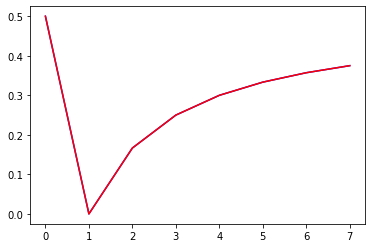

In [87]:
fg,axs = plt.subplots(1)
axs.plot([k for k in range(8)],error1,"b")
axs.plot([k for k in range(8)],error2,"r")